##Part 1: CIFAR10 Classification

Follow along the tutorial for CIFAR10 classification found here: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html.

In [1]:
# Load the CIFAR10 data
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 28953344.53it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


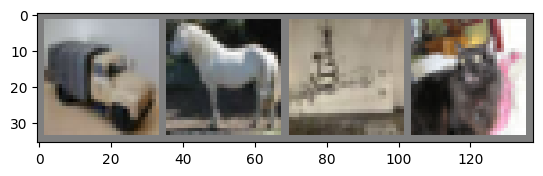

truck horse ship  cat  


In [2]:
# Visualize the data
import matplotlib.pyplot as plt
import numpy as np

# Functions to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [3]:
# Define the model
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # Add code here
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Add code here
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [4]:
# Define the loss and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:
# Train the network
for epoch in range(5):  # Loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            # Add code here
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.208
[1,  4000] loss: 1.830
[1,  6000] loss: 1.648
[1,  8000] loss: 1.568
[1, 10000] loss: 1.497
[1, 12000] loss: 1.480
[2,  2000] loss: 1.408
[2,  4000] loss: 1.391
[2,  6000] loss: 1.353
[2,  8000] loss: 1.320
[2, 10000] loss: 1.301
[2, 12000] loss: 1.291
[3,  2000] loss: 1.231
[3,  4000] loss: 1.224
[3,  6000] loss: 1.212
[3,  8000] loss: 1.199
[3, 10000] loss: 1.203
[3, 12000] loss: 1.212
[4,  2000] loss: 1.099
[4,  4000] loss: 1.125
[4,  6000] loss: 1.136
[4,  8000] loss: 1.129
[4, 10000] loss: 1.110
[4, 12000] loss: 1.114
[5,  2000] loss: 1.016
[5,  4000] loss: 1.058
[5,  6000] loss: 1.065
[5,  8000] loss: 1.056
[5, 10000] loss: 1.076
[5, 12000] loss: 1.054
Finished Training


In [8]:
# Test the network
correct = 0
total = 0
# Since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        # Add code here...
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = net(images)
        # The class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 59 %


Train more epochs by editing the code above. Can you get the accuracy better than 60%? Write your answer below in code or text form.

** Your answer here **

Yes, we can almost get 60% accuracy by increasing epochs (5 here).

##Part 2: SVHN Classification 
Follow the tutorial from above, replicating steps using the SVHN dataset instead of the CIFAR10. 

In [9]:
# Load the SVHN data
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.SVHN(root='./data', split = 'train', download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.SVHN(root='./data', split = 'test', download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Do not need the classes variable as there is no need to visualize

100%|██████████| 182040794/182040794 [00:16<00:00, 11129921.68it/s]


100%|██████████| 64275384/64275384 [00:10<00:00, 6071231.57it/s] 


In [10]:
# Define the mdoel
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # Add code here
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Add code here
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [11]:
# Define the loss and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
# Train the network
for epoch in range(5):  # Loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            # Add code here
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.246
[1,  4000] loss: 2.238
[1,  6000] loss: 2.223
[1,  8000] loss: 1.842
[1, 10000] loss: 1.035
[1, 12000] loss: 0.775
[1, 14000] loss: 0.672
[1, 16000] loss: 0.605
[1, 18000] loss: 0.560
[2,  2000] loss: 0.497
[2,  4000] loss: 0.495
[2,  6000] loss: 0.505
[2,  8000] loss: 0.473
[2, 10000] loss: 0.464
[2, 12000] loss: 0.448
[2, 14000] loss: 0.445
[2, 16000] loss: 0.431
[2, 18000] loss: 0.448
[3,  2000] loss: 0.382
[3,  4000] loss: 0.396
[3,  6000] loss: 0.395
[3,  8000] loss: 0.373
[3, 10000] loss: 0.375
[3, 12000] loss: 0.379
[3, 14000] loss: 0.388
[3, 16000] loss: 0.400
[3, 18000] loss: 0.380
[4,  2000] loss: 0.338
[4,  4000] loss: 0.342
[4,  6000] loss: 0.330
[4,  8000] loss: 0.355
[4, 10000] loss: 0.332
[4, 12000] loss: 0.345
[4, 14000] loss: 0.338
[4, 16000] loss: 0.341
[4, 18000] loss: 0.340
[5,  2000] loss: 0.274
[5,  4000] loss: 0.312
[5,  6000] loss: 0.300
[5,  8000] loss: 0.323
[5, 10000] loss: 0.304
[5, 12000] loss: 0.321
[5, 14000] loss: 0.303
[5, 16000] 

In [13]:
# Test the network
correct = 0
total = 0
# Since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = net(images)
        # The class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 87 %


Can you get a better accuracy than your Homework 3? Write your answer below in code or text form. 

** Your answer here **

Yes, the accuracy I got above is 87% using 5 epochs which is lot better compared to the accuracy of around 30% I got in Homework3.